# Data Scienc Intern

## Author: Aditya Sandeep Singh

### Exploratory Data Analysis on Dataset - Terrorism(Intermediate Level) 

As a security/defense analyst, try to find out the hot zone of terrorism.



## Task:

### Exploratory Data Analysis on Dataset - Terrorism 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings 

In [5]:
dataset=pd.read_csv('dataset/globalterrorismdb_0718dist.csv')

C:\Users\adity\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
dataset.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [9]:
dataset.shape

(181691, 135)

In [13]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [15]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [17]:
dataset.tail

<bound method NDFrame.tail of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  

In [18]:
dataset.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


## Data Analysis 


In [44]:
most_terrorism=dataset.country_txt.value_counts().head(10)
c=list(most_terrorism.index)

## Countries Most Affected

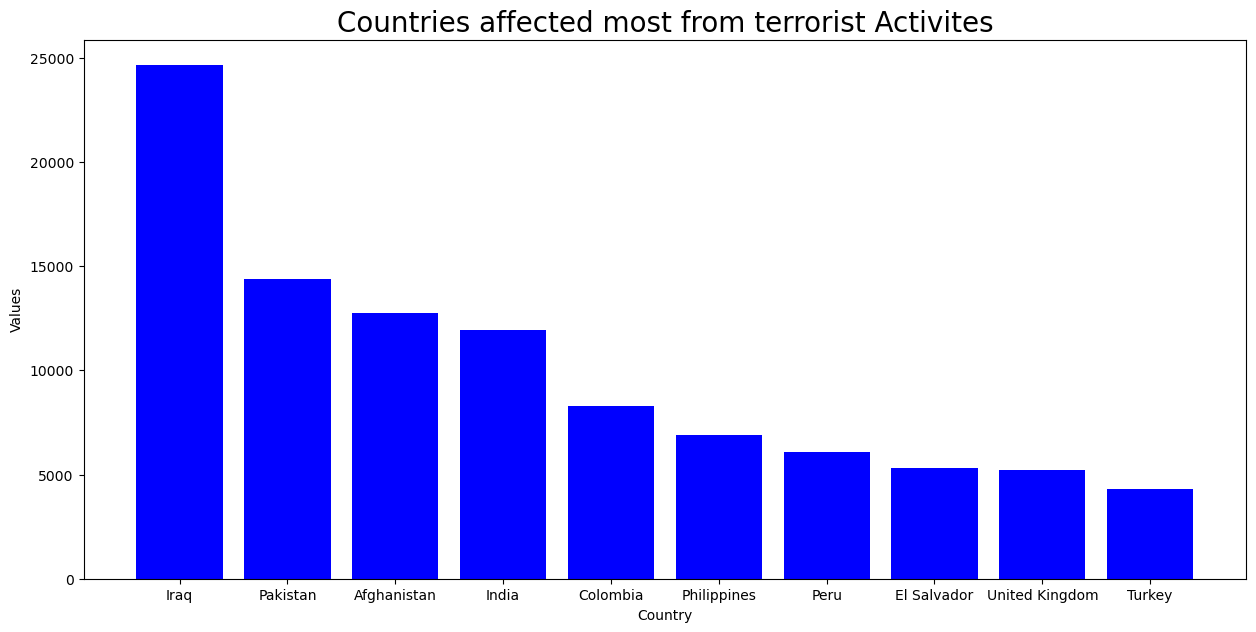

In [127]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(most_terrorism.index,most_terrorism.values,color='Blue')
plt.title('Countries affected most from terrorist Activites',fontsize='20')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

In [50]:
print("Name of countries with most terror activites: ")
print(c)

Name of countries with most terror activites: 
['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey']


In [52]:
y=dataset.iyear.value_counts().head(10)
c=list(y)

## Years Most Affected

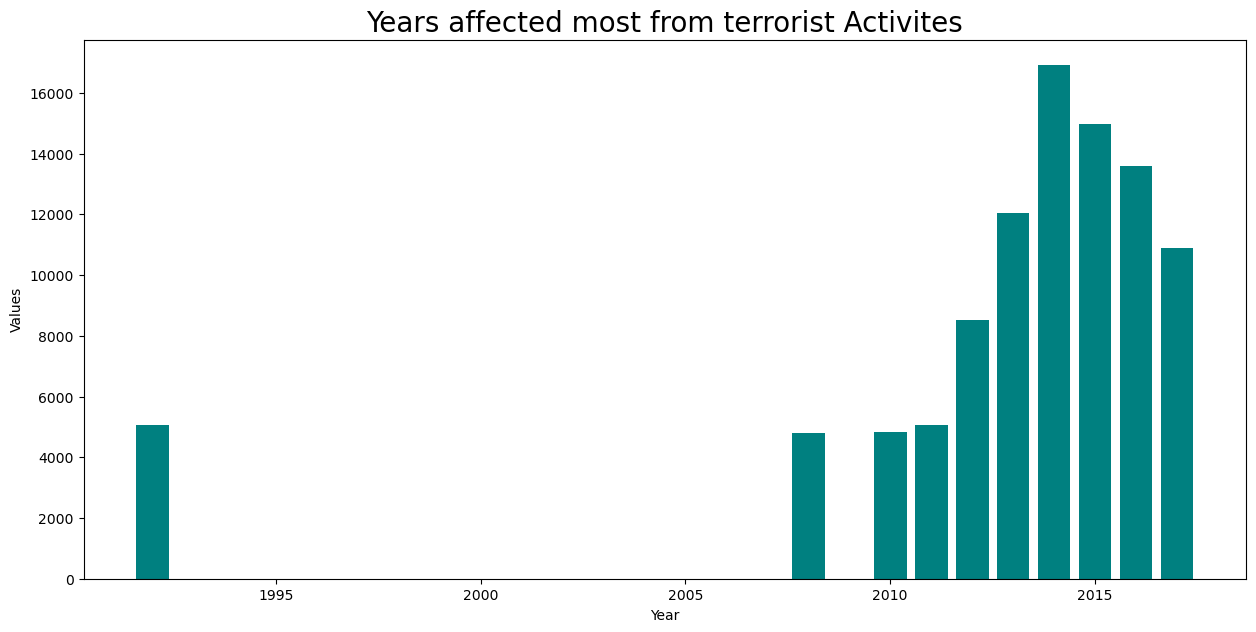

In [126]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(y.index,y.values,color='#008080')
plt.title('Years affected most from terrorist Activites',fontsize='20')
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()

In [61]:
print("Years Most Affected are:")
dataset.iyear.value_counts().head(10)

Years Most Affected are:


2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: iyear, dtype: int64

## Attack every year in Descending Order

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


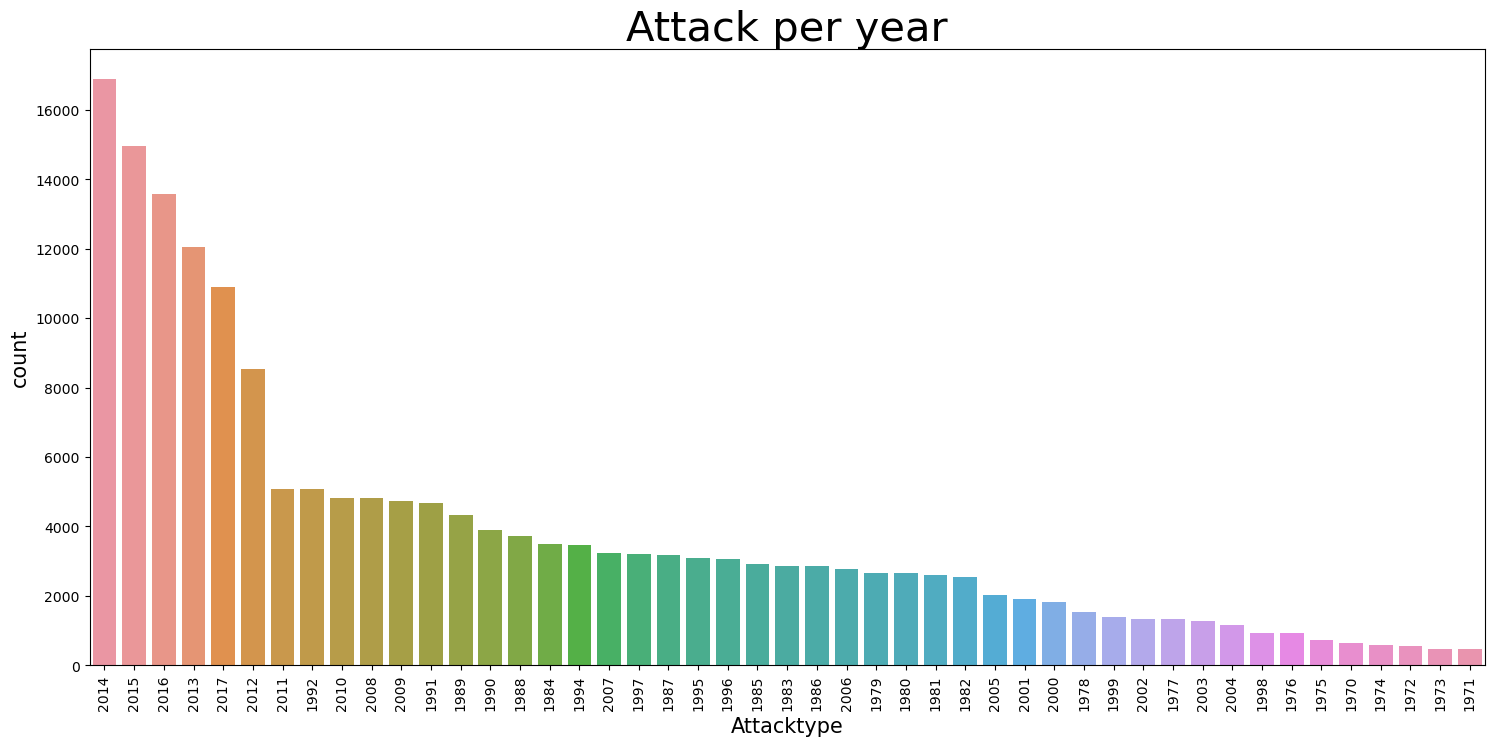

In [122]:
plt.subplots(figsize=(18,8))
sns.countplot(dataset["iyear"],order=dataset['iyear'].value_counts().index,)
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=30)
plt.show()

## Cities Most Affected

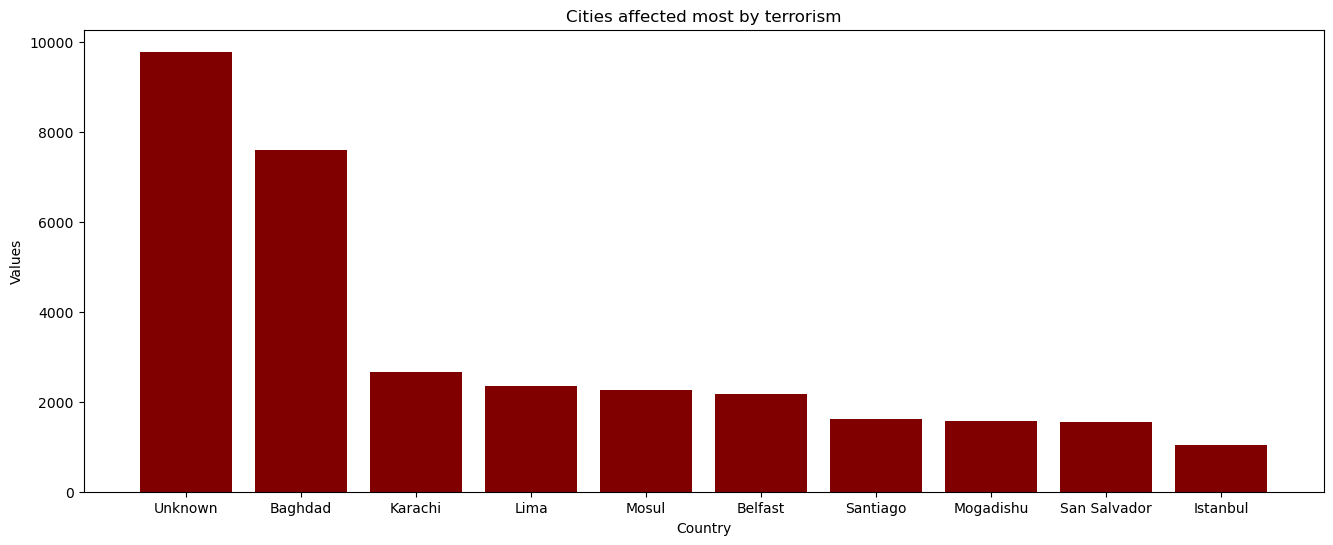

In [102]:
cities= dataset.city.value_counts().head(10)
c = list(cities.index)
cities
fig,ax = plt.subplots(figsize=(16,6))
plt.style.use('default')
ax.bar(cities.index,cities.values,color='#800000')
plt.title('Cities affected most by terrorism')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

In [104]:
print("Cities most affected by terrorist activities:")
print(c)

Cities most affected by terrorist activities:
['Unknown', 'Baghdad', 'Karachi', 'Lima', 'Mosul', 'Belfast', 'Santiago', 'Mogadishu', 'San Salvador', 'Istanbul']


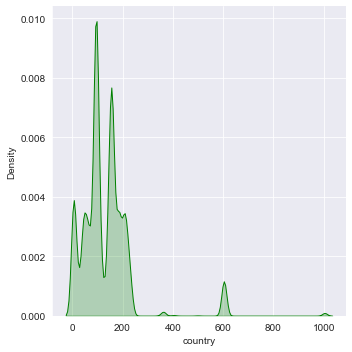

In [66]:
sns.displot(dataset,x='country',kind='kde',fill='tree',color='green')
sns.set_style("darkgrid")

## Types Of Attack

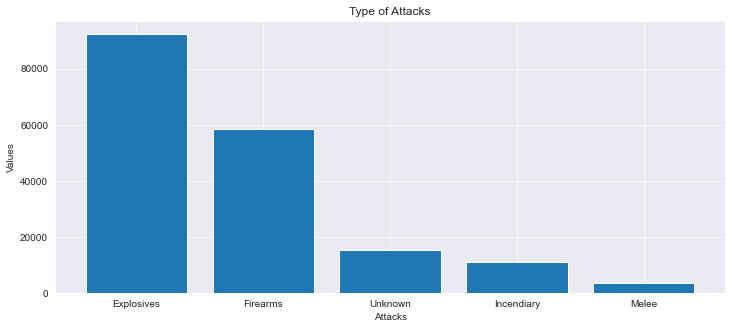

In [78]:
weapon = dataset['weaptype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(12,5))
ax.bar(weapon.index,weapon.values)
plt.title('Type of Attacks')
plt.xlabel("Attacks")
plt.ylabel("Values")
plt.show()

In [79]:
print("Most Attack are done by: Explosives")

Most Attack are done by: Explosives


## Target Area 

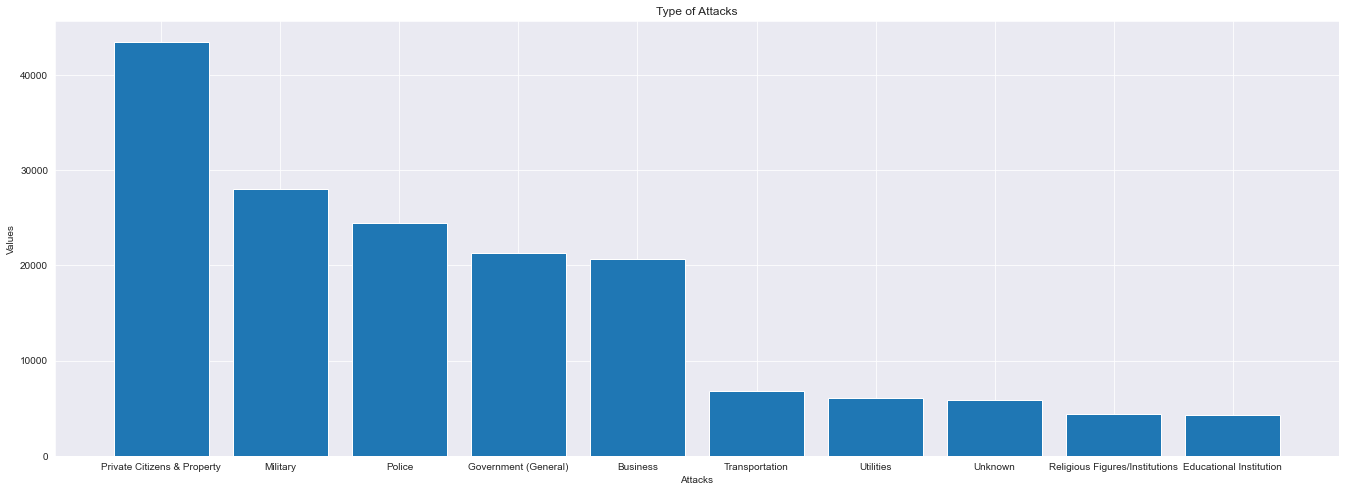

In [93]:
ta = dataset['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(23,8))
ax.bar(ta.index,ta.values)
plt.title('Type of Attacks')
plt.xlabel("Attacks")
plt.ylabel("Values")
plt.show()

In [94]:
print("Most attacks are done on Citizens and Property")

Most attacks are done on Citizens and Property


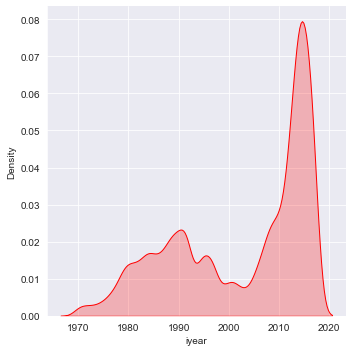

In [96]:
sns.displot(dataset,x='iyear',kind='kde',fill='tree',color='red')

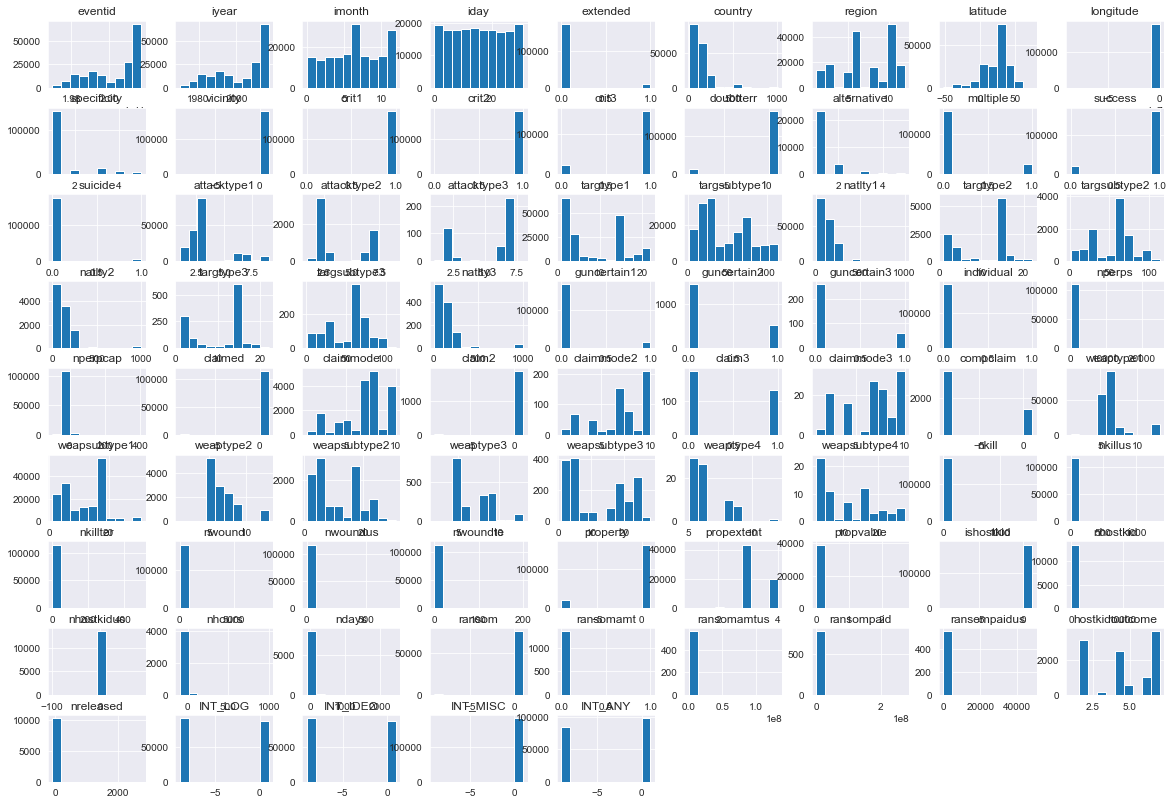

In [98]:
dataset.hist(figsize=(20,14))
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='country', ylabel='Density'>

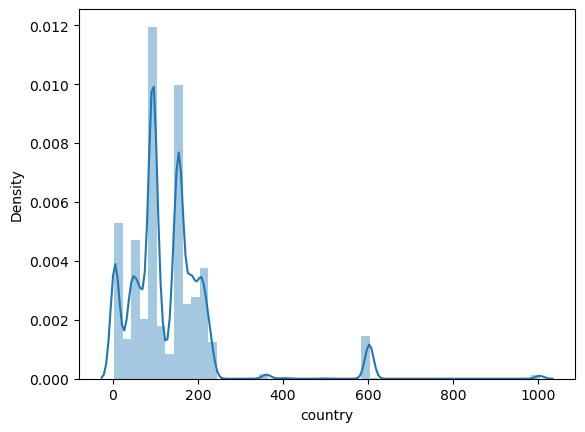

In [105]:
sns.distplot(a=dataset['country'])

## Attacks Every Year

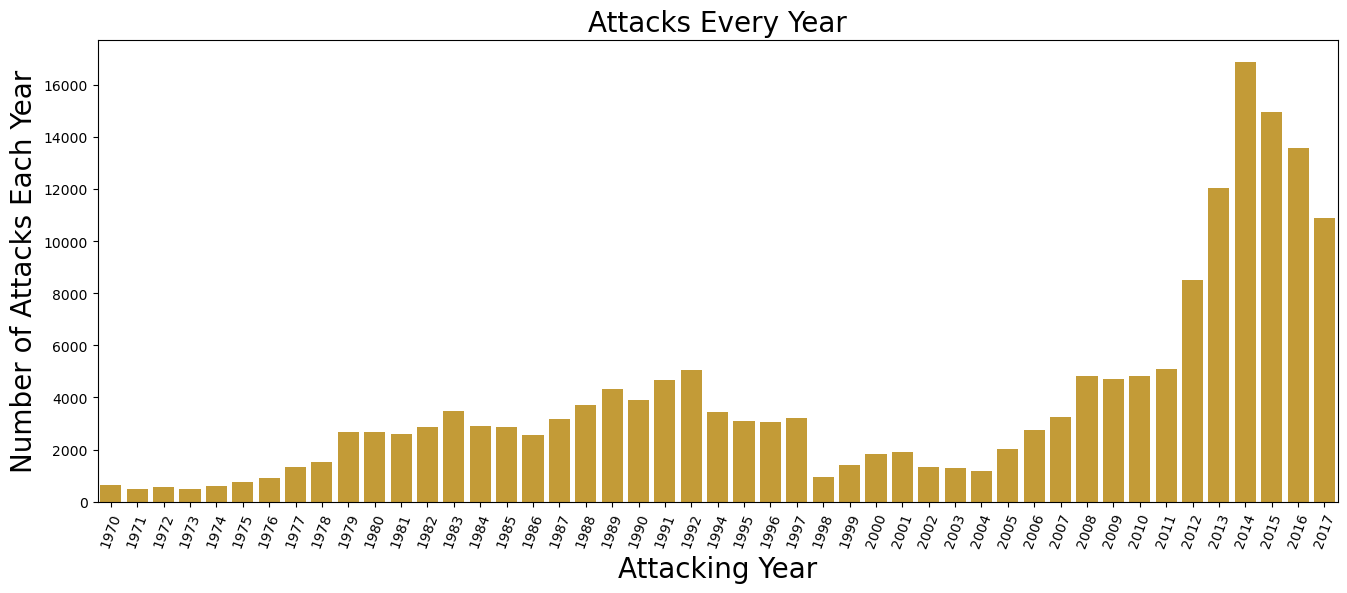

In [114]:
year = dataset['iyear'].unique()
count = dataset['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,6))
sns.barplot(x = year,
           y = count,color='#DAA520')
plt.xticks(rotation = 70)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks Every Year',fontsize=20)
plt.show()

## Group Attack

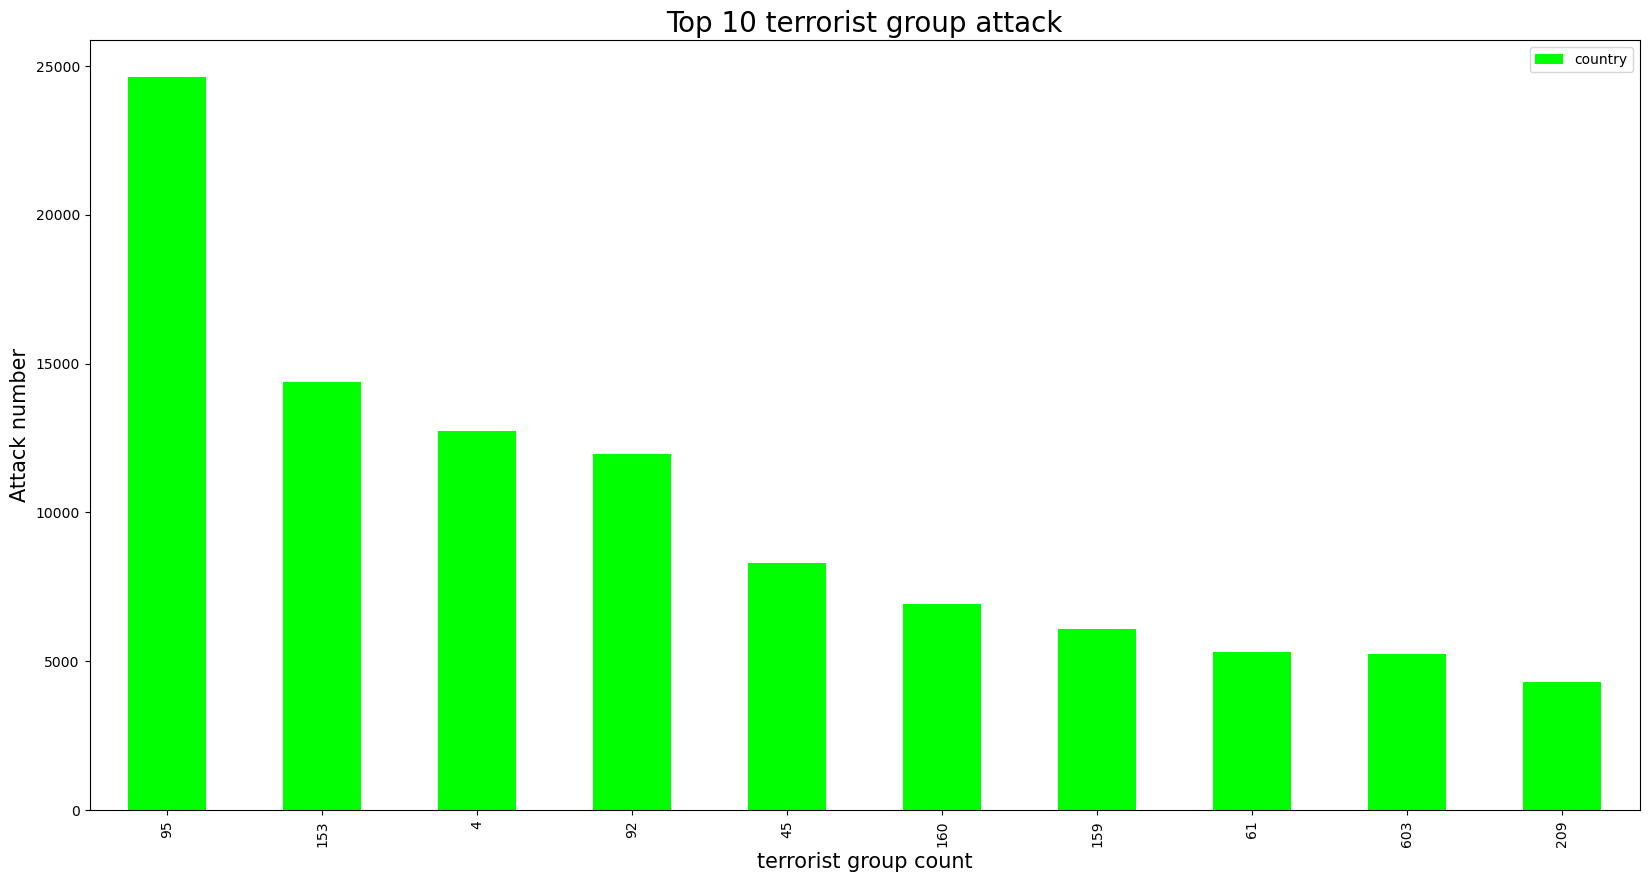

In [117]:
dataset['country'].value_counts().to_frame().head(10).plot(kind='bar',color='#00FF00',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group count",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

## Conclusions

1.Country with the most attacks: Iraq

2.Regions with most Attack:Private Citizens & Property.

3.Year with the most attacks: 2014

4.Most Attack Types: Bombing/Explosion

5.City with the most attacks: Baghdad